# 課題2：住宅価格の回帰モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なライブラリの読み込み

In [3]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [5]:
# データを変数datasetに読み込む
dataset = pd.read_csv("iowa_ames_housing_price.csv")

In [6]:
# データの最初の5行を表示
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 3. 目的変数と説明変数の選択

ここでは、以下の列を使用します。

- 目的変数： `price`
- 説明変数： `OverallQual`, `area`, `X2ndFlrSF`, `BsmtFinSF1`,  `OverallCond`

In [7]:
# 目的変数の列名（変更しないでください）
target_col = 'price'

# 説明変数の列名（変更しないでください）
feature_cols = ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [8]:
# target_col と feature_cols を使用して dataset より目的変数と説明変数に該当する列を取得し、
# numpy 配列に変換したものを変数 Y と X に格納する

# Y:目的変数に該当する列
Y = dataset[target_col].values

# X:説明変数に該当する列
X = dataset[feature_cols].values

## 4. データの分割

この課題では、ホールドアウト法でデータを分割します。

In [9]:
# X と Y を 機械学習用データとテストデータに7:3で分ける(X_train, X_test, Y_train, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)


In [10]:
# 機械学習用データを、学習データと検証データに7:3で分ける(X_train, X_valid, Y_train, Y_valid)
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=42
)

## 5. モデルの作成から評価まで

線形回帰モデルと、回帰木、ランダムフォレストの3つのモデルを作成して比較します。それぞれのモデルで以下を行います。
- モデルの作成
- 学習データによる学習
- 検証データによる予測
- MSEの算出

In [11]:
# 線形回帰モデルを作成し、学習・予測を実施して、MSEを算出する

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_valid)

mse = mean_squared_error(Y_valid, Y_pred)

print("平均二乗誤差（MSE）:", mse)

平均二乗誤差（MSE）: 1307481021.8735888


In [12]:
# 回帰木のモデルを作成し、学習・予測を実施して、MSEを算出する
model_tree = DecisionTreeRegressor(random_state=42)

model_tree.fit(X_train, Y_train)

Y_pred_tree = model_tree.predict(X_valid)

mse_tree = mean_squared_error(Y_valid, Y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("平均二乗誤差（MSE）:", mse_tree)
print("二乗平均平方根誤差（RMSE）:", rmse_tree)

平均二乗誤差（MSE）: 1742599459.4362106
二乗平均平方根誤差（RMSE）: 41744.454235697114


In [13]:
# ランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する
model_rf = RandomForestRegressor(
    n_estimators=100, 
    random_state=42
)

model_rf.fit(X_train, Y_train)

Y_pred_rf = model_rf.predict(X_valid)

mse_rf = mean_squared_error(Y_valid, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("平均二乗誤差（MSE）:", mse_rf)
print("二乗平均平方根誤差（RMSE）:", rmse_rf)

平均二乗誤差（MSE）: 992042069.1389139
二乗平均平方根誤差（RMSE）: 31496.699337214905


## 6. テストデータによる汎化性能の確認

3つの中でもっともMSEの値が良かったモデルについて、テストデータで汎化性能を確認しましょう。

In [14]:
# テストデータを使って予測を行いMSEを算出
Y_pred_test = model_rf.predict(X_test)

mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)

print("【テストデータ評価】")
print("平均二乗誤差（MSE）:", mse_test)
print("二乗平均平方根誤差（RMSE）:", rmse_test)

【テストデータ評価】
平均二乗誤差（MSE）: 938765262.9349399
二乗平均平方根誤差（RMSE）: 30639.276475382703


## 7. グラフによる確認

説明変数が多い場合、「説明変数で目的変数を正しく予測できているか」を可視化することは困難です。そこで「正解と予測値」とを比較することで、予測の精度を可視化してみましょう。

### 散布図による可視化

X軸(横方向)に `テストデータの正解の値` 、Y軸(縦方向)に `予測値` を使って散布図を作成してみましょう。全体的に右肩上がりで、直線上にデータが並んでいれば、予測が行なえていると判断できます。

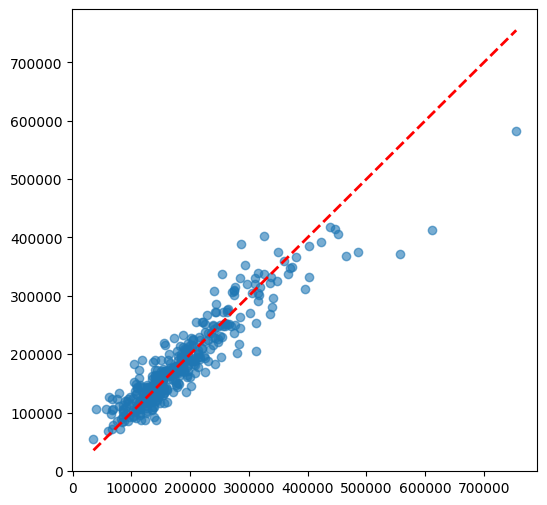

In [15]:
# X軸:正解の値、Y軸:予測値で散布図を作成

plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_test, alpha=0.6)


plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', lw=2, label='理想線（y = x）')

### ヒストグラムによる可視化

「誤差率＝正解の値と予測値との差の割合」をヒストグラムで確認してみましょう。誤差率は以下で計算できます。

`（正解の値－予測値）/ 正解の値`

併せて、誤差率の平均値、標準偏差も出力しましょう。平均値は `numpy` の `mean` 関数、標準偏差は `std` 関数で取得できます。

なお、ヒストグラムを描く際は`matplotlib.pyplot`の`hist`関数が使えます。matplotlib.pyplotはpltという名前をつけているはずなので、ヒストグラム化したいデータを`plt.hist()`の引数に渡すことでヒストグラムを描画できます。

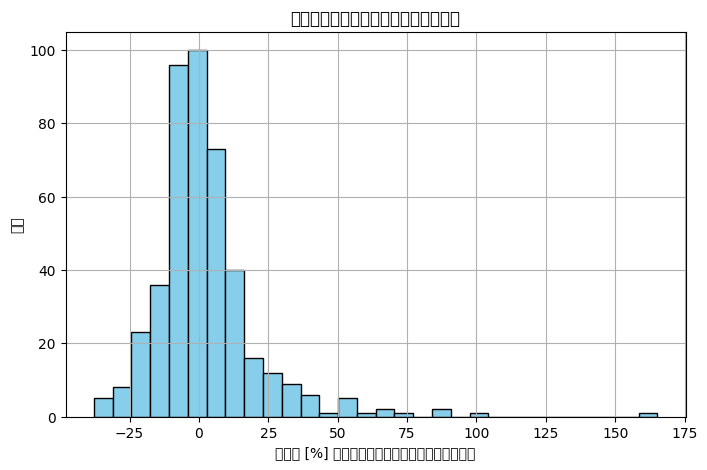

誤差率の平均値（%）: 2.383992597889127
誤差率の標準偏差（%）: 19.313699532245504


In [18]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
error_rate = (Y_pred_test - Y_test) / Y_test * 100

plt.figure(figsize=(8,5))
plt.hist(error_rate, bins=30, color='skyblue', edgecolor='black')
plt.title('実際の価格と予測価格の誤差率の分布')
plt.xlabel('誤差率 [%] （＋は高めに予測、－は安めに予測）')
plt.ylabel('件数')
plt.grid(True)
plt.show()

# 平均値
mean_error = np.mean(error_rate)
print("誤差率の平均値（%）:", mean_error)

# 標準偏差
std_error = np.std(error_rate)
print("誤差率の標準偏差（%）:", std_error)